In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
data=pd.read_csv("all_month (1).csv")

In [141]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-07-16T14:13:08.670Z,40.366665,-123.920502,20.23,1.87,md,5.0,167.0,0.096860,0.00,...,2020-07-16T14:15:31.404Z,"22km SE of Rio Dell, CA",earthquake,2.36,0.60,0.060,4.0,automatic,nc,nc
1,2020-07-16T14:04:35.830Z,38.815666,-122.817833,2.34,1.37,md,28.0,50.0,0.009813,0.03,...,2020-07-16T14:12:05.510Z,"7km NW of The Geysers, CA",earthquake,0.19,0.38,0.130,5.0,automatic,nc,nc
2,2020-07-16T13:59:57.770Z,36.399333,-117.952000,-0.30,1.78,ml,18.0,106.0,0.111000,0.28,...,2020-07-16T14:04:10.703Z,"14km NNE of Olancha, CA",earthquake,0.66,31.61,0.184,25.0,automatic,ci,ci
3,2020-07-16T13:58:38.770Z,19.374332,-155.293839,7.54,1.72,md,12.0,255.0,NaN,0.15,...,2020-07-16T14:01:34.530Z,"9 km SW of Volcano, Hawaii",earthquake,1.68,1.03,0.770,7.0,automatic,hv,hv
4,2020-07-16T13:55:28.740Z,33.483667,-116.792500,6.24,0.41,ml,16.0,49.0,0.029370,0.17,...,2020-07-16T13:59:14.070Z,"8km NE of Aguanga, CA",earthquake,0.32,0.95,0.131,9.0,automatic,ci,ci


In [142]:
data.drop(['magType','nst','gap','rms','updated','type','horizontalError','depthError','magError','magNst','status','locationSource','magSource'],axis=1,inplace=True)

In [143]:
data.head()

,time,latitude,longitude,depth,mag,dmin,net,id,place
0,2020-07-16T14:13:08.670Z,40.366665,-123.920502,20.23,1.87,0.096860,nc,nc73427091,"22km SE of Rio Dell, CA"
1,2020-07-16T14:04:35.830Z,38.815666,-122.817833,2.34,1.37,0.009813,nc,nc73427086,"7km NW of The Geysers, CA"
2,2020-07-16T13:59:57.770Z,36.399333,-117.952000,-0.30,1.78,0.111000,ci,ci38593058,"14km NNE of Olancha, CA"
3,2020-07-16T13:58:38.770Z,19.374332,-155.293839,7.54,1.72,NaN,hv,hv72046837,"9 km SW of Volcano, Hawaii"
4,2020-07-16T13:55:28.740Z,33.483667,-116.792500,6.24,0.41,0.029370,ci,ci38593042,"8km NE of Aguanga, CA"


In [144]:
data.drop(['net','id'],axis=1,inplace=True)

In [145]:
data.head()

,time,latitude,longitude,depth,mag,dmin,place
0,2020-07-16T14:13:08.670Z,40.366665,-123.920502,20.23,1.87,0.096860,"22km SE of Rio Dell, CA"
1,2020-07-16T14:04:35.830Z,38.815666,-122.817833,2.34,1.37,0.009813,"7km NW of The Geysers, CA"
2,2020-07-16T13:59:57.770Z,36.399333,-117.952000,-0.30,1.78,0.111000,"14km NNE of Olancha, CA"
3,2020-07-16T13:58:38.770Z,19.374332,-155.293839,7.54,1.72,NaN,"9 km SW of Volcano, Hawaii"
4,2020-07-16T13:55:28.740Z,33.483667,-116.792500,6.24,0.41,0.029370,"8km NE of Aguanga, CA"


In [146]:
data['mag'][0]

1.87

In [147]:
data['dmin'].replace(np.nan,data['dmin'].mean(),inplace=True)

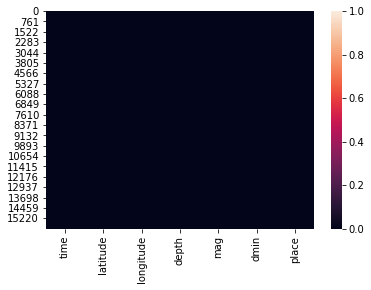

In [148]:
sns.heatmap(data.isnull())

In [155]:
c=[]
for i in range(len(data)):
    if data['mag'][i]<5:
        data['cdi'][i]=(0.4466+0.8809*data['mag'][i]-0.02945*((4+data['dmin'][i]**2)**0.5))
    else:
        data['cdi'][i]=float(0.4466+0.8809*data['mag'][i]-0.02945*((25+data['dmin'][i]**2)**0.5)+ 0.002100*data['mag'][i]*data['dmin'][i] )

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [153]:
for i in data['cdi']:print(i)

2.034913966513892
1.5945322910325577
1.95561135638508
1.9018612569078015
0.7488626494726768
2.1485132304808015
1.0130709742770176
1.0043289398095416
1.1188056887278266
1.6826223257100332
1.0043267532269866
1.8842432304808012
1.9987602304808014
0.8281461053662621
1.2685938084629256
1.6199732304808014
1.8842432304808012
1.6199732304808014
1.823565391695613
1.206878527044199
1.7961532304808014
1.7961532304808014
2.9422944230097845
1.6199732304808014
1.0923759323060982
1.0130882282630864
4.519609125080076
1.5318832304808012
1.0307405580951696
1.797131982783135
1.0924076249375185
1.3557032304808014
1.690628400249603
1.524055537148754
1.1012261832219734
1.0040592112663689
1.664879797050679
3.20422654153109
1.6199732304808014
1.4270821147990596
1.5318832304808012
1.6199732304808014
2.6779961370104437
1.6199732304808014
1.885195965633091
1.5328638084629254
1.1805004589727606
1.0659871494877784
0.5110172729557043
4.2783921484357075
1.7883199786149102
1.0307500115165553
1.955680375595066
0.82716

1.5680511664879684
2.9070611373499804
2.016857925954711
1.9104614985663444
0.40531490900836925
1.7971060656317686
1.7961532304808014
2.668742944604912
4.086859801386399
0.1850781060701547
0.7311331150594425
0.2554730461240679
1.0923960840929383
2.0604232304808012
0.528631606822951
1.532792578022398
1.0219355886951393
0.6607389250850804
1.5318832304808012
1.4183530000000002
-0.4491683596553864
1.6209533741226847
2.501853374122685
1.2685987210563405
1.4437932304808014
1.092415759352658
1.3654987257724798
2.228281576487625
3.3122330648505964
0.9162387557506423
1.6199732304808014
1.7961532304808014
3.0298617500013463
3.1624708077694867
2.5898917104801837
3.9107132671100313
3.9107774526974612
2.042805230480801
1.6199732304808014
1.7961532304808014
1.5328633741226845
1.6649262146958048
1.647385693742065
1.7961532304808014
-0.6253368495966154
1.400733788079442
1.0219214037306807
1.2676132304808014
1.6297531919212478
1.1795232304808012
0.45816543141934074
1.6199732304808014
1.7089890626600754


2.1485132304808015
2.7649169012330925
2.042805230480801
2.0780412304808014
1.919616014209186
1.9821017002130166
3.9977922089229487
1.3557032304808014
1.444760853249538
1.6208779552541082
2.0604232304808012
1.6199732304808014
1.2676132304808014
1.8939936478945913
2.4127832304808012
2.0604232304808012
1.2862158295094654
2.2463091705346536
1.277385092482046
2.766124743715818
0.22032763223345478
2.756862627328152
1.7080632304808012
1.3566793695093153
1.1795232304808012
2.2366032304808012
1.6199732304808014
2.580598788498745
1.3557032304808014
1.0043209816279162
1.444775759352658
0.5726873412513707
1.14526895015919
1.8834172696627798
2.1485132304808015
1.4447709816279164
1.3302624160326897
1.4437932304808014
1.1716813241337902
1.4437932304808014
2.1668704354304134
2.2370790791601407
0.872194703126342
1.4447746329820237
1.1804893223670798
1.0043209816279162
0.8810008300688948
0.5726453639014142
2.748467452811443
1.620958115230156
2.5282735775567637
2.5889632304808017
1.057169356629774
0.1938

1.2685830392419977
1.1795232304808012
2.977523974855431
1.0043182211777644
2.237588556967677
1.6385757555728575
0.8281235009609429
1.7618884568499384
1.4800133477897681
1.6209289016472417
1.3829220250470573
1.4270038269975542
4.6804178123446905
4.204839096123066
2.4127832304808012
1.0924109816279164
1.127655196002081
1.6033359401194467
4.437637786120632
1.2509037914198216
1.1795232304808012
1.3566892637546015
1.4359043951095356
1.8235413767109547
0.052955561295986234
0.03533668171974559
1.8147181527830387
0.5286362430008849
1.5681057158895852
2.7749221802670574
2.281606960273027
1.2685946329820237
1.1715419020802975
0.28196476292058403
1.29500632236708
2.308042095163349
1.4437932304808014
2.4958283664446985
1.8852209816279162
1.4447704589727608
1.2680852180172097
-0.07917738432584773
2.1489852180172098
0.6607476428239888
1.7966252180172098
1.2157433141476126
2.0956592833348013
-0.5284368940981589
1.9290533650845119
1.5328544230097845
1.9106702304808012
0.82805935638508
1.44425745269746

1.2685141863126397
0.7400573421974653
1.0393595509519276
4.313953419559739
1.3478315153371974
1.8842432304808012
0.9162257479242926
1.2676132304808014
1.0924093695093153
0.31722674616118934
1.0924194182599347
1.2676132304808014
1.8939975121519383
2.5894952729573926
1.6209430392419977
0.8281429250624129
2.352040311121875
1.8930522304808015
1.1099943752305357
1.0924173421974654
1.6199732304808014
1.4447738084629256
1.2685899215997594
1.356682925062413
1.286215889761976
1.6209400951633492
1.356633012368677
3.3817732304808015
1.682291910822473
1.8940387763118898
-0.1672777145736054
1.3557032304808014
1.7089577170931654
1.5328624612824469
2.440152292403975
1.3557032304808014
1.8842432304808012
1.7080632304808012
0.7576083955025112
2.2368221196351
1.7090464366577878
2.633904682484635
1.0571036544590857
2.1485132304808015
1.2861459125633652
2.0437277390602535
0.863320911687493
0.7576492656467043
0.37005444866222587
1.814730349523292
2.484165450294121
2.5008732304808015
1.6208935908752917
1.79

2.0437812573251692
-0.46678549607643194
1.3566669157236317
2.3210659079745093
1.8842432304808012
1.5318832304808012
1.2676132304808014
0.5628932304808012
1.3566723252894135
0.8721943175121019
1.2421405675131099
1.7961532304808014
2.686821968452425
2.942211013377855
1.2676132304808014
2.1485132304808015
1.0043199215997591
2.1485132304808015
0.5282001234996399
2.4048538369789036
1.2684879935872633
1.7090446329820235
4.674243649984566
2.915721081462381
1.709049109144237
1.7971361053662622
0.9162370550736213
1.233314575640658
0.8105291861013095
1.013086154568913
1.00432422808281
3.97592458348577
0.8281467655835268
1.7080632304808012
1.9733013010401759
1.8850951764167885
1.2685904589727608
-0.052764907176049265
1.3566878722759315
1.0658806305712067
1.1805070550736212
0.9162319827831347
4.058993041251226
0.7400473518283764
1.3557032304808014
1.0043289398095416
0.4581710431772717
1.4437932304808014
1.6121155910577256
1.4437932304808014
1.5318832304808012
1.9116454555533602
2.515452067087091
0

1.8842432304808012
1.6209553986172347
1.9635241952448013
1.0219022311342847
1.6209317053461583
3.733804831528406
2.0692322040538014
4.181159435377498
1.3390717746042011
2.3256657479242926
1.4447778722759315
0.704814826376767
2.836015267110031
4.211325150767172
0.7841004792421461
0.7840796192857067
4.103371086415552
1.2685961053662622
1.312638227560078
4.571779284341428
2.3873021504497887
1.8842432304808012
1.6209186004869032
1.312530073061449
0.8986206641565221
1.80593994035713
1.0043069157236315
4.2974166271278404
0.9338533432371807
4.36892867593249
1.550480578607391
1.2421728094767066
0.8633782334397297
0.8457144792216953
0.6167336453965625
1.8852219827831347
1.5328624612824469
1.7080632304808012
2.3246932304808015
0.4933990690155746
1.1188446155342031
1.3566669157236317
1.4447498509161907
3.5563550505871357
2.042805230480801
1.4447305153371974
0.3788899256266786
1.7089458317514559
2.6339527129054523
1.5592904005982071
4.328674741348136
1.4799410914204607
1.1188308828900404
1.9733142

2.766056273818564
1.9733050928239508
0.5550702687525282
2.9413232304808012
1.1364506635933322
1.5318832304808012
1.2421604978574192
1.3557032304808014
1.2685760840929383
2.852824089850057
2.061391596625078
4.615924394542559
0.5550699800603547
1.0033432304808012
0.044145040756533444
0.8105212573251694
1.8842432304808012
1.673484954754114
3.961826813836106
2.5018550231602625
0.5902969379350902
2.2903446720379965
2.0604232304808012
1.3566782211777646
0.9602703959975949
2.2366032304808012
0.47480323048080125
1.0043053315722144
1.9723332304808014
1.88515133591953
4.1204263969420465
1.5318832304808012
1.0571700250935514
2.3246932304808015
1.356689549767176
3.394185434057617
1.1795232304808012
1.2676132304808014
1.885190810516108
0.6255421010272042
0.8810031665002176
1.1276538244501422
1.7961532304808014
1.9291923329622167
3.02733090160338
0.572675229593306
4.261386735332317
2.0260671915019492
0.7048053751570675
1.4437932304808014
1.7961532304808014
1.6033254186590582
0.64314654641686
1.86757

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15975 entries, 0 to 15974
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       15975 non-null  object 
 1   latitude   15975 non-null  float64
 2   longitude  15975 non-null  float64
 3   depth      15975 non-null  float64
 4   mag        15970 non-null  float64
 5   dmin       15975 non-null  float64
 6   place      15975 non-null  object 
 7   cdi        15970 non-null  float64
dtypes: float64(6), object(2)
memory usage: 998.6+ KB


In [174]:
X=data[['mag','dmin']]
Y=data['cdi']

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
lm=LinearRegression()

In [179]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
predict=lm.predict(X_test)
predict

array([0.79403953, 1.00587675, 0.67913898, ..., 1.68388766, 2.49770083,
       1.43874144])

In [181]:
from sklearn.metrics import accuracy_score

In [183]:
accuracy_score(y_test.astype('int'),predict.astype('int'))

0.9933235969121635